#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Mounting the Drive
**To read the file (Dataset)**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Datasets/IRIS.csv' #dataset file path

#**Data Preprocessing**



##Data Collection

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Duplicate Record

In [6]:
print(f'The Number of Duplicate Records Are: {df.duplicated().sum()}')

The Number of Duplicate Records Are: 3


**Duplicate Records Founds. Lets Drop Them**

In [7]:
df.drop_duplicates(inplace=True)

**No Duplicate Record Now**

In [8]:
print(f'The Number of Duplicate Records Are: {df.duplicated().sum()}')

The Number of Duplicate Records Are: 0


In [9]:
df.reset_index(drop=True, inplace=True)

**Total Instances:** 147 <br>
**with zero duplicate record.**<br>
**4 Features + Target Variable: "species"**

In [10]:
df.shape

(147, 5)

##**Features Overview**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**All features are numerical.**<br>
**However, the Target Variable is not numerical and needs to be encoded.**

**Features Names**

In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Unique Value Counts**

In [13]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

**Basic Statistics**

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##**Missing Values Count**

In [15]:
df.isnull().sum().sort_values(ascending=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**No missing values**

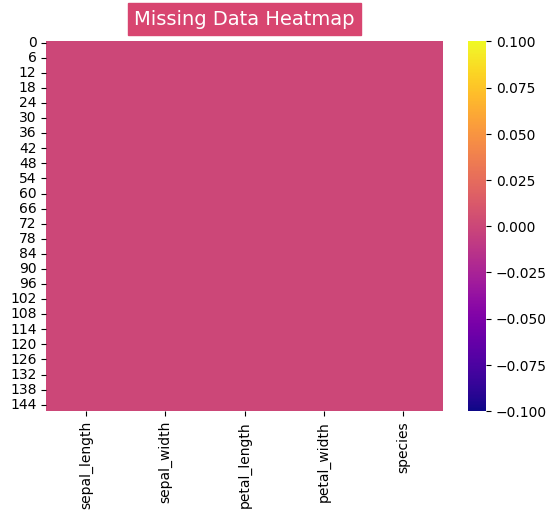

In [16]:
sns.heatmap(df.isnull(), cmap='plasma')
plt.title('Missing Data Heatmap', backgroundcolor='#D84570', color='white',
          fontsize=14, pad=12)
plt.show()

#**Target Counts**

In [17]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

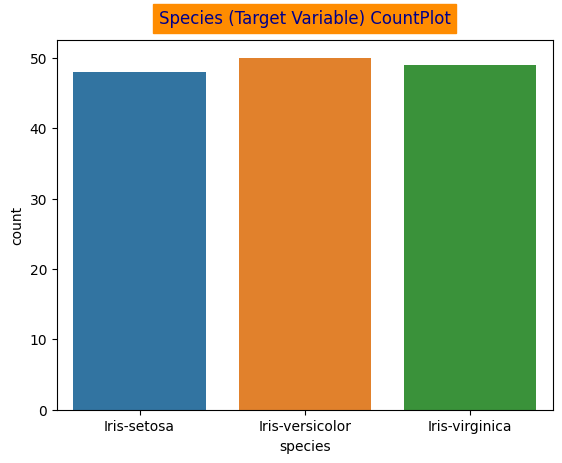

In [18]:
sns.countplot(x='species', data=df)
plt.title('Species (Target Variable) CountPlot',  color='darkblue',
                    backgroundcolor='darkorange', pad=12)
plt.show()

#**Data Encoding**


In [19]:
unique_target = df['species'].unique()

In [20]:
encoding_dict = {}
for val, key in enumerate(unique_target):
  encoding_dict.update({key:val})

In [21]:
encoding_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [22]:
df['target'] = df['species'].map(encoding_dict)

In [23]:
df.drop('species', axis=1, inplace=True)

In [24]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#**Data Splitting**

In [25]:
from sklearn.model_selection import train_test_split as tts

In [26]:
X=df.drop('target',axis=1)
y=df['target']

X_train, X_test,y_train,y_test=tts(X,y,test_size=0.25, shuffle=True, stratify=y, random_state=67)

In [27]:
y_train.unique()

array([2, 1, 0])

#**Data Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
Scaler = StandardScaler()
Scaler.fit(X_train)
Xtrain_std = Scaler.transform(X_train)
Xtest_std = Scaler.transform(X_test)

#**Models Training**

**Lets Create a list to record the accuracy yield by different models**

In [30]:
Model = []
Train = []
Test  = []

##**Support Vector Classification**

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [32]:
svc=SVC()
svc.fit(Xtrain_std,y_train)
y_pred=svc.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=svc.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    97.27
Test Accuracy    :    91.89

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37

CONFUSION MATRIX: 

[[12  0  0]
 [ 0 12  1]
 [ 0  2 10]]


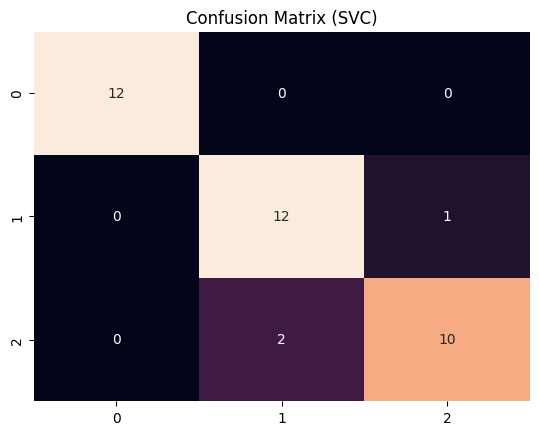

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix (SVC)')
plt.show()

In [34]:
Model.append('SVC')
Train.append(train_acc)
Test.append(test_acc)

##**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(Xtrain_std, y_train)
y_pred=lr.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=lr.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    97.27
Test Accuracy    :    91.89

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37

CONFUSION MATRIX: 

[[12  0  0]
 [ 0 12  1]
 [ 0  2 10]]


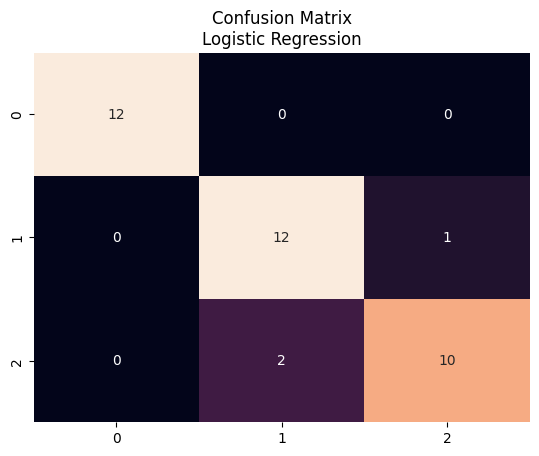

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nLogistic Regression')
plt.show()

In [38]:
Model.append('Logistic Reg')
Train.append(train_acc)
Test.append(test_acc)

##**KNN**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

**Let find the optimize k**

In [40]:
neighbors = np.arange(1,10,2,dtype='int')
Accuracy_List = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain_std,y_train)
    y_pred=knn.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_train, y_pred=knn.predict(Xtrain_std))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [k, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [41]:
K_df = pd.DataFrame(Accuracy_List, columns= ["k", "Train Accuracy", "Test Accuracy"])
K_df.head(5)

,k,Train Accuracy,Test Accuracy
0,1,100.00,89.19
1,3,96.36,89.19
2,5,97.27,89.19
3,7,98.18,86.49
4,9,97.27,89.19


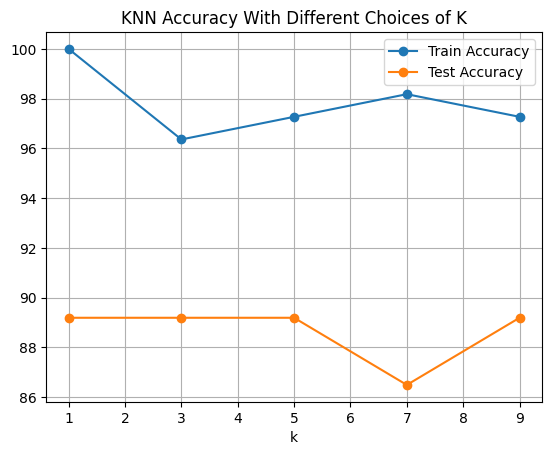

In [42]:
#Lets analyze the best K
K_df.plot(kind='line',marker='o',x='k')
plt.title('KNN Accuracy With Different Choices of K')
plt.grid('on')
plt.show()

In [43]:
K=3

In [44]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(Xtrain_std,y_train)
y_pred=knn.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=knn.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    96.36
Test Accuracy    :    89.19

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      0.85      0.85        13
           2       0.83      0.83      0.83        12

    accuracy                           0.89        37
   macro avg       0.89      0.89      0.89        37
weighted avg       0.89      0.89      0.89        37

CONFUSION MATRIX: 

[[12  0  0]
 [ 0 11  2]
 [ 0  2 10]]


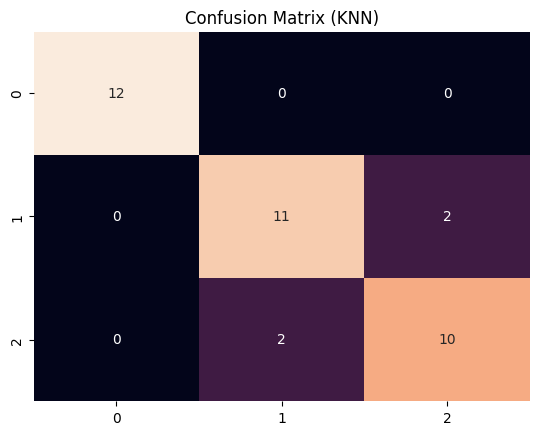

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix (KNN)')
plt.show()

In [46]:
Model.append('KNN')
Train.append(train_acc)
Test.append(test_acc)

##**Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'max_depth': [1, 3, 5, 7, 9, 10, 12, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [  1, 2, 4, 8, 10]}

# Create the DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=32)

# Create the GridSearchCV object
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

# Fit the model with the data
grid_search.fit(Xtrain_std, y_train)  # Replace X_train and y_train with your training data

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [49]:
best_dt_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=2, random_state=32)

In [50]:
DT = best_dt_classifier
DT.fit(Xtrain_std,y_train)
y_pred=DT.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=DT.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    99.09
Test Accuracy    :    91.89

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37

CONFUSION MATRIX: 

[[12  0  0]
 [ 0 12  1]
 [ 0  2 10]]


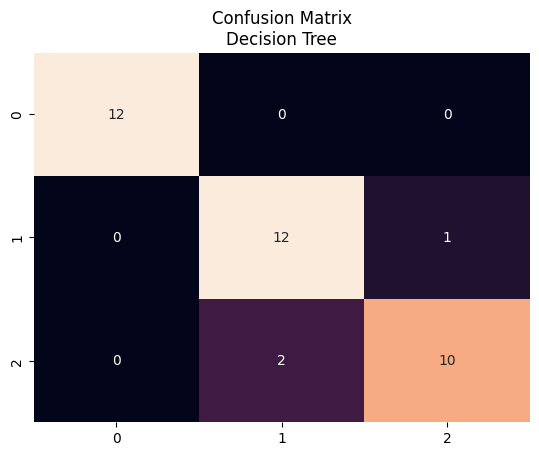

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nDecision Tree')
plt.show()

In [52]:
Model.append('Dec. Tree')
Train.append(train_acc)
Test.append(test_acc)

##**Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
estimator = np.arange(1,10,dtype='int')
Accuracy_List = []
for n in estimator:
    RF = RandomForestClassifier(n_estimators=n)
    RF.fit(Xtrain_std,y_train)
    y_pred=RF.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_train, y_pred=RF.predict(Xtrain_std))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [n, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [55]:
N_df = pd.DataFrame(Accuracy_List, columns= ["n", "Train Accuracy", "Test Accuracy"])
N_df.head(5)

,n,Train Accuracy,Test Accuracy
0,1,95.45,83.78
1,2,98.18,91.89
2,3,100.00,91.89
3,4,97.27,91.89
4,5,99.09,91.89


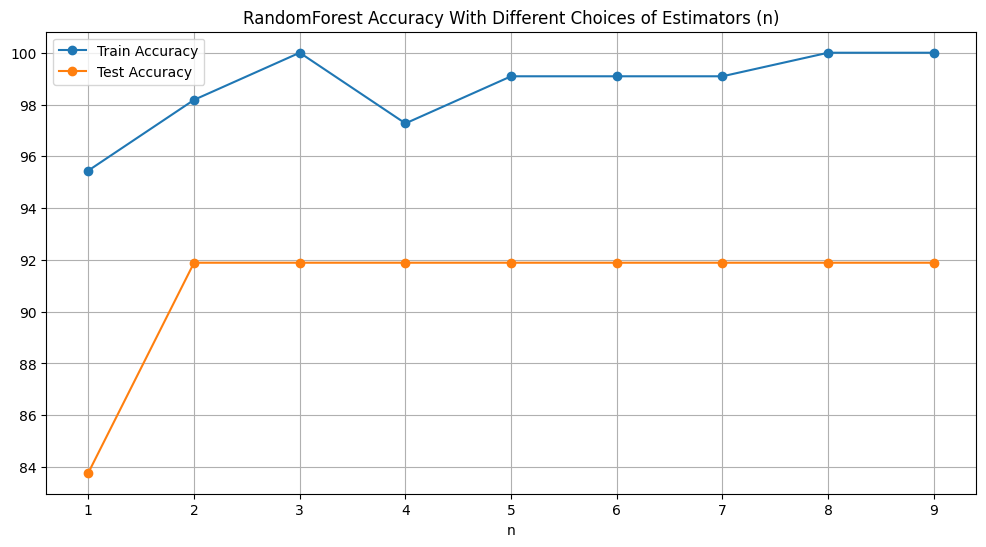

In [56]:
#Lets analyze the best estimator n
fig,ax=plt.subplots(figsize=(12,6))
N_df.plot(kind='line',marker='o',x='n',ax=ax)
plt.title('RandomForest Accuracy With Different Choices of Estimators (n)')
plt.grid()
plt.show()

In [57]:
n=2

In [58]:
RF = RandomForestClassifier(n_estimators=n)
RF.fit(Xtrain_std,y_train)
y_pred=RF.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=RF.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    98.18
Test Accuracy    :    91.89

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37

CONFUSION MATRIX: 

[[12  0  0]
 [ 0 12  1]
 [ 0  2 10]]


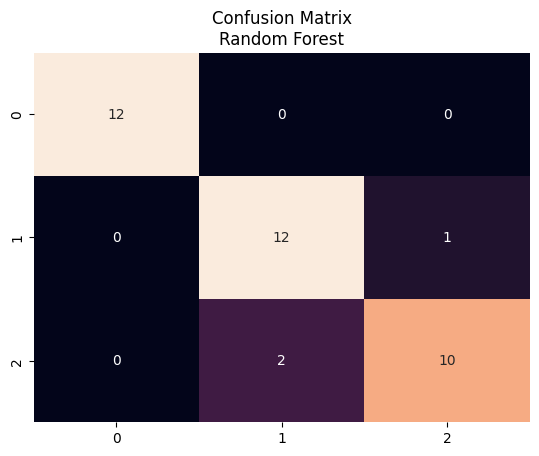

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nRandom Forest')
plt.show()

In [60]:
Model.append('Rand. Forest')
Train.append(train_acc)
Test.append(test_acc)

##**Gradient Boosting**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
estimator = np.arange(1,10,dtype='int')
Accuracy_List = []
for n in estimator:
    GBC = GradientBoostingClassifier(n_estimators=n)
    GBC.fit(Xtrain_std,y_train)
    y_pred=GBC.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_train, y_pred=GBC.predict(Xtrain_std))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [n, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [63]:
N_df = pd.DataFrame(Accuracy_List, columns= ["n", "Train Accuracy", "Test Accuracy"])
N_df.head(5)

,n,Train Accuracy,Test Accuracy
0,1,99.09,83.78
1,2,99.09,86.49
2,3,100.00,86.49
3,4,100.00,86.49
4,5,100.00,86.49


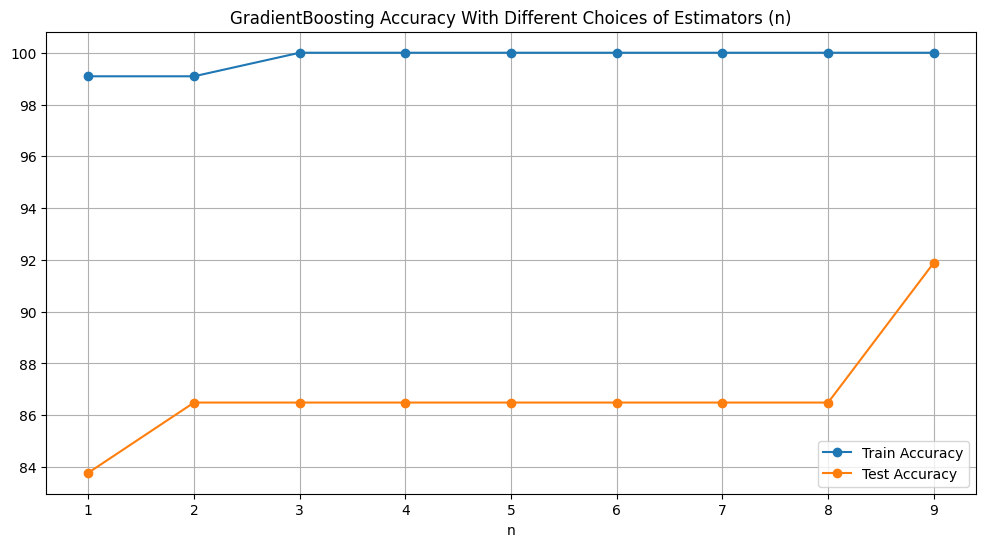

In [64]:
#Lets analyze the best estimator n
fig,ax=plt.subplots(figsize=(12,6))
N_df.plot(kind='line',marker='o',x='n',ax=ax)
plt.title('GradientBoosting Accuracy With Different Choices of Estimators (n)')
plt.grid('on')
plt.show()

In [65]:
n=2

In [66]:
GBC = GradientBoostingClassifier(n_estimators=n)
GBC.fit(Xtrain_std,y_train)
y_pred=GBC.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=GBC.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    99.09
Test Accuracy    :    86.49

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.77      0.80        13
           2       0.77      0.83      0.80        12

    accuracy                           0.86        37
   macro avg       0.87      0.87      0.87        37
weighted avg       0.87      0.86      0.86        37

CONFUSION MATRIX: 

[[12  0  0]
 [ 0 10  3]
 [ 0  2 10]]


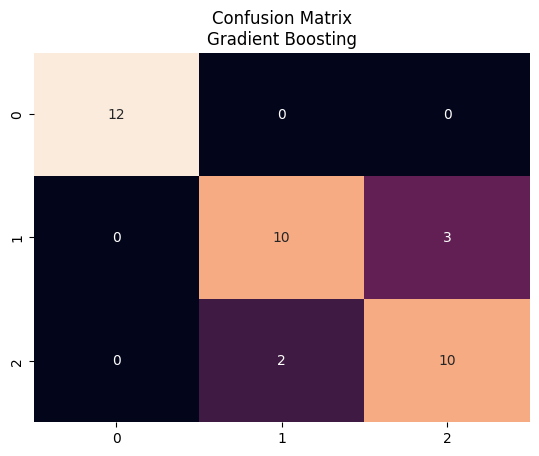

In [67]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nGradient Boosting')
plt.show()

In [68]:
Model.append('Grad. Boosting')
Train.append(train_acc)
Test.append(test_acc)

In [69]:
data = {'Train': Train, 'Test':Test}
acc_df = pd.DataFrame(data=data, index=Model)
acc_df.index.name = 'Model / Accuracy'
acc_df

,Train,Test
Model / Accuracy,,
SVC,97.272727,91.891892
Logistic Reg,97.272727,91.891892
KNN,96.363636,89.189189
Dec. Tree,99.090909,91.891892
Rand. Forest,98.181818,91.891892
Grad. Boosting,99.090909,86.486486


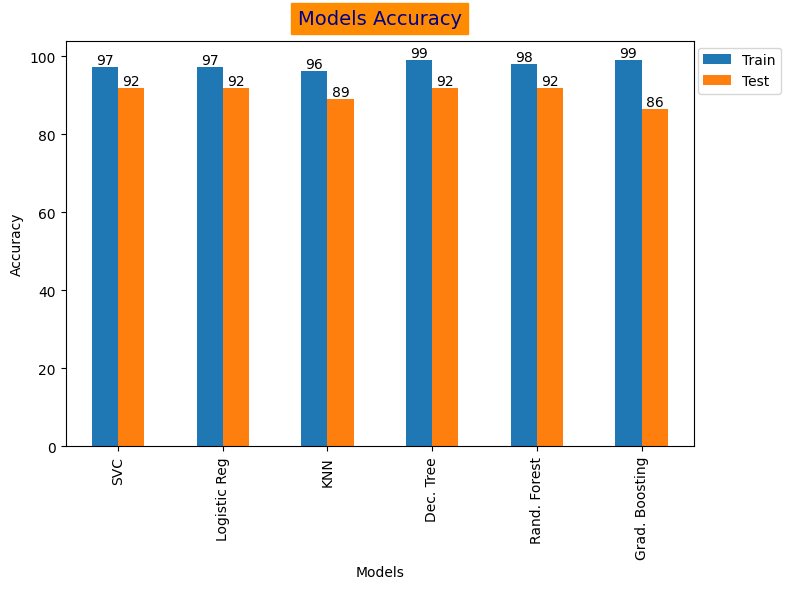

In [70]:
fig, axis = plt.subplots(figsize=(8,6))
ax = acc_df.plot(kind='bar', ax=axis)
# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Models Accuracy', color='darkblue', backgroundcolor='darkorange', pad=12, fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

**Since the Iris dataset is well-balanced and does not contain noise, it provides a solid foundation for model training and evaluation. As a result, the performance of almost all models was consistently strong. This is due to the dataset's even distribution of classes and the absence of outliers or irregularities, allowing machine learning models to make accurate and reliable predictions.**